# Análises de Dinâmica Molecular

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## Funções

In [2]:
def converte_xvg(caminho_xvg, nome_colunas):
    
    data = np.loadtxt(caminho_xvg, comments=['#', '@'])
    df_xvg = pd.DataFrame(data)
    df_xvg.columns = nome_colunas
    
    return df_xvg

## Parâmetros de fonte dos gráficos

In [3]:
# Define font sizes
SIZE_DEFAULT = 17
SIZE_LARGE = 17
plt.rc("font", family="Arial")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

## MCR 6mer apo

### RMSD (_Root Mean Square Deviation_)

In [4]:
colunas_rmsd = ['ps', 'nm']

mcr_6mer_apo_rmsd1 = converte_xvg('analises_mcr_6mer_apo/rmsd_ca-ca.1.xvg', colunas_rmsd) 
mcr_6mer_apo_rmsd2 = converte_xvg('analises_mcr_6mer_apo/rmsd_ca-ca.2.xvg', colunas_rmsd) 
mcr_6mer_apo_rmsd3 = converte_xvg('analises_mcr_6mer_apo/rmsd_ca-ca.3.xvg', colunas_rmsd)

#print(mcr_6mer_apo_rmsd1)
mcr_6mer_apo_rmsd1 = mcr_6mer_apo_rmsd1[mcr_6mer_apo_rmsd1["ps"] % 1000 == 0].reset_index(drop=True)
mcr_6mer_apo_rmsd2 = mcr_6mer_apo_rmsd2[mcr_6mer_apo_rmsd2["ps"] % 1000 == 0].reset_index(drop=True)
mcr_6mer_apo_rmsd3 = mcr_6mer_apo_rmsd3[mcr_6mer_apo_rmsd3["ps"] % 1000 == 0].reset_index(drop=True)

#mcr_6mer_apo_rmsd1

       ps    RMSD_1    RMSD_2    RMSD_3  RMSD_media  RMSD_std   ns
0     0.0  0.000001  0.000001  0.000001    0.000001  0.000000  0.0
1  1000.0  0.112705  0.117234  0.112705    0.114214  0.002615  1.0
2  2000.0  0.119856  0.125937  0.119856    0.121883  0.003511  2.0
3  3000.0  0.119025  0.127829  0.119025    0.121960  0.005083  3.0
4  4000.0  0.123475  0.125687  0.123475    0.124213  0.001277  4.0


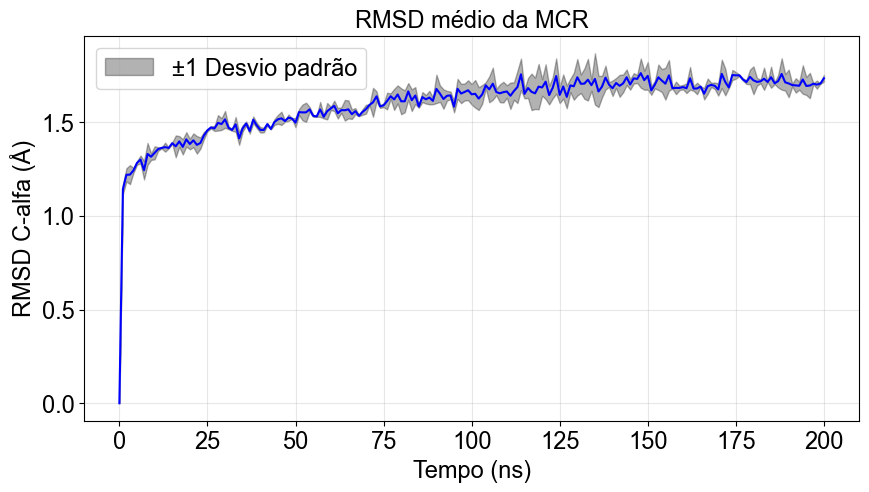

In [6]:
# Exemplo: df1, df2 e df3 são suas replicatas
# Cada um tem colunas: "tempo" (ns), "RMSD" (Å)

# Renomear colunas de RMSD para identificar cada replicata
df1 = mcr_6mer_apo_rmsd1.rename(columns={"nm": "RMSD_1"})
df2 = mcr_6mer_apo_rmsd2.rename(columns={"nm": "RMSD_2"})
df3 = mcr_6mer_apo_rmsd1.rename(columns={"nm": "RMSD_3"})

# Juntar todos pelo tempo
df_all = df1.merge(df2, on="ps").merge(df3, on="ps")

# Calcular média e desvio padrão
df_all["RMSD_media"] = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].mean(axis=1)
df_all["RMSD_std"]   = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].std(axis=1)
df_all["ns"] = df_all["ps"] / 1000

print(df_all.head())


# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["ns"], df_all["RMSD_media"]*10, color="blue") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["ns"],
    df_all["RMSD_media"]*10 - df_all["RMSD_std"]*10,
    df_all["RMSD_media"]*10 + df_all["RMSD_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSD C-alfa (Å)")
plt.title("RMSD médio da MCR")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSD MCR_APO.jpg', dpi=400)
plt.show()

### RMSF (_Root Mean Square Fluctuation_)

In [7]:
colunas_rmsf = ['Número do resíduo','RMSF']
mcr_6mer_apo_rmsf_chA1 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chA.1.xvg', colunas_rmsf)
mcr_6mer_apo_rmsf_chA2 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chA.2.xvg',colunas_rmsf)
mcr_6mer_apo_rmsf_chA3 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chA.3.xvg',colunas_rmsf)


mcr_6mer_apo_rmsf_chB1 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chB.1.xvg', colunas_rmsf)
mcr_6mer_apo_rmsf_chB2 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chB.2.xvg',colunas_rmsf)
mcr_6mer_apo_rmsf_chB3 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chB.3.xvg',colunas_rmsf)


mcr_6mer_apo_rmsf_chC1 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chC.1.xvg', colunas_rmsf)
mcr_6mer_apo_rmsf_chC2 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chC.2.xvg',colunas_rmsf)
mcr_6mer_apo_rmsf_chC3 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chC.3.xvg',colunas_rmsf)
mcr_6mer_apo_rmsf_chC3

Número do resíduo    RMSF
0               3001.0  0.4212
1               3002.0  0.2011
2               3003.0  0.1155
3               3004.0  0.1274
4               3005.0  0.0530
..                 ...     ...
243             3244.0  0.0418
244             3245.0  0.0590
245             3246.0  0.0864
246             3247.0  0.0700
247             3248.0  0.1633

[248 rows x 2 columns]

In [8]:
df1 = mcr_6mer_apo_rmsf_chA1.rename(columns={"RMSF": "RMSF_1"})
df2 = mcr_6mer_apo_rmsf_chA2.rename(columns={"RMSF": "RMSF_2"})
df3 = mcr_6mer_apo_rmsf_chA3.rename(columns={"RMSF": "RMSF_3"})


df4 = mcr_6mer_apo_rmsf_chB1.rename(columns={"RMSF": "RMSF_4"})
df5 = mcr_6mer_apo_rmsf_chB2.rename(columns={"RMSF": "RMSF_5"})
df6 = mcr_6mer_apo_rmsf_chB3.rename(columns={"RMSF": "RMSF_6"})


df7 = mcr_6mer_apo_rmsf_chC1.rename(columns={"RMSF": "RMSF_7"})
df8 = mcr_6mer_apo_rmsf_chC2.rename(columns={"RMSF": "RMSF_8"})
df9 = mcr_6mer_apo_rmsf_chC3.rename(columns={"RMSF": "RMSF_9"})

# Juntar todos pelo tempo
df_all_1 = df1.merge(df2, on="Número do resíduo").merge(df3, on="Número do resíduo")
df_all_2 = df4.merge(df5, on="Número do resíduo").merge(df6, on="Número do resíduo")
df_all_3 = df7.merge(df8, on="Número do resíduo").merge(df9, on="Número do resíduo")



# Calcular média e desvio padrão
df_all_1["RMSF_media"] = df_all_1[["RMSF_1", "RMSF_2", "RMSF_3"]].mean(axis=1)
df_all_1["RMSF_std"]   = df_all_1[["RMSF_1", "RMSF_2", "RMSF_3"]].std(axis=1)


df_all_2["RMSF_media"] = df_all_2[["RMSF_4", "RMSF_5", "RMSF_6"]].mean(axis=1)
df_all_2["RMSF_std"]   = df_all_2[["RMSF_4", "RMSF_5", "RMSF_6"]].std(axis=1)


df_all_3["RMSF_media"] = df_all_3[["RMSF_7", "RMSF_8", "RMSF_9"]].mean(axis=1)
df_all_3["RMSF_std"]   = df_all_3[["RMSF_9", "RMSF_8", "RMSF_9"]].std(axis=1)

print(df_all_1.head(), print())
print(df_all_2.head(), print())
print(df_all_3.head(), print())


   Número do resíduo  RMSF_1  RMSF_2  RMSF_3  RMSF_media  RMSF_std
0             1001.0  0.6407  0.3300  0.3455    0.438733  0.175080
1             1002.0  0.2853  0.1664  0.1165    0.189400  0.086719
2             1003.0  0.2056  0.1368  0.0928    0.145067  0.056853
3             1004.0  0.1676  0.1358  0.1198    0.141067  0.024331
4             1005.0  0.1438  0.0949  0.0797    0.106133  0.033494 None

   Número do resíduo  RMSF_4  RMSF_5  RMSF_6  RMSF_media  RMSF_std
0             2001.0  0.4436  0.3047  0.1890    0.312433  0.127476
1             2002.0  0.1568  0.1921  0.0927    0.147200  0.050391
2             2003.0  0.0998  0.1046  0.0863    0.096900  0.009488
3             2004.0  0.1080  0.1133  0.0939    0.105067  0.010027
4             2005.0  0.0783  0.0769  0.0754    0.076867  0.001450 None

   Número do resíduo  RMSF_7  RMSF_8  RMSF_9  RMSF_media  RMSF_std
0             3001.0  0.4327  0.2763  0.4212    0.376733  0.083658
1             3002.0  0.1569  0.1428  0.2011    0

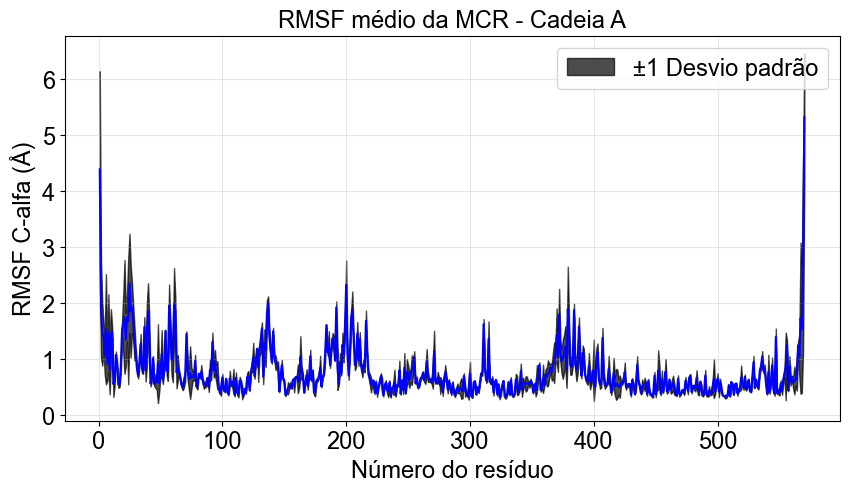

In [10]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_1["Número do resíduo"]-1000, df_all_1["RMSF_media"]*10, color="blue") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_1["Número do resíduo"]-1000,
    df_all_1["RMSF_media"]*10 - df_all_1["RMSF_std"]*10,
    df_all_1["RMSF_media"]*10 + df_all_1["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia A")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chA MCR_APO.jpg', dpi=400)
plt.show()

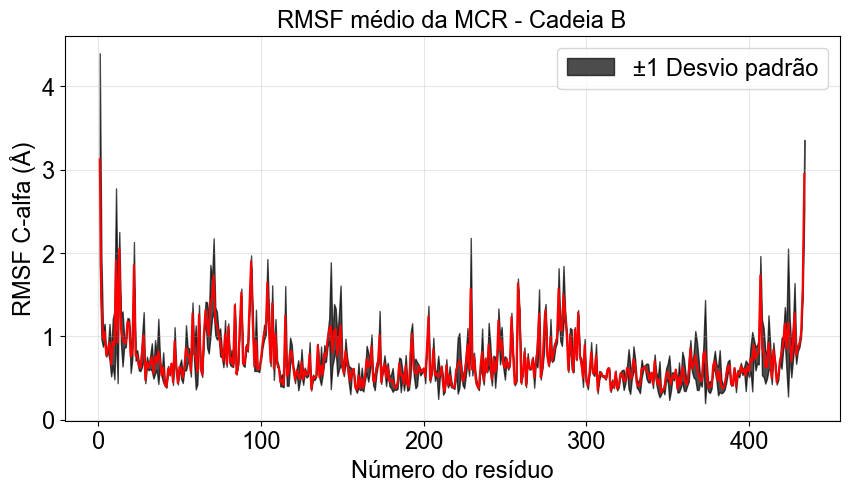

In [11]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_2["Número do resíduo"]-2000, df_all_2["RMSF_media"]*10, color="red") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_2["Número do resíduo"]-2000,
    df_all_2["RMSF_media"]*10 - df_all_2["RMSF_std"]*10,
    df_all_2["RMSF_media"]*10 + df_all_2["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia B")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chB MCR_APO.jpg', dpi=400)
plt.show()

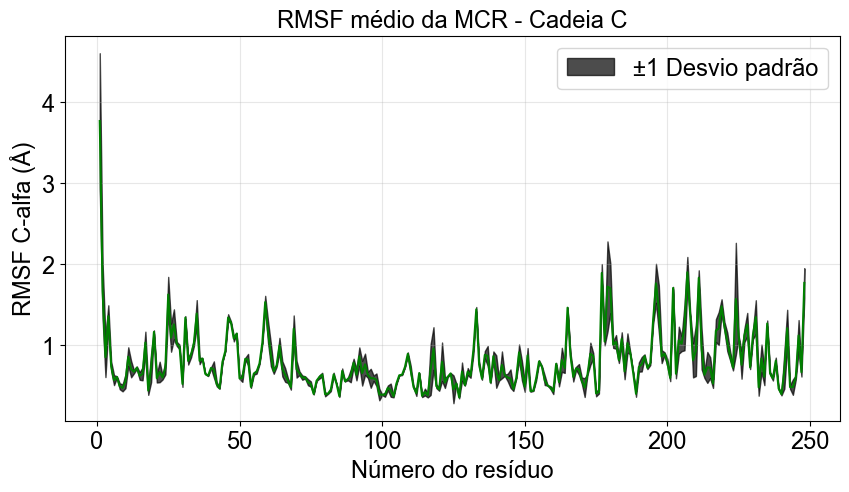

In [12]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_3["Número do resíduo"]-3000, df_all_3["RMSF_media"]*10, color="green") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_3["Número do resíduo"]-3000,
    df_all_3["RMSF_media"]*10 - df_all_3["RMSF_std"]*10,
    df_all_3["RMSF_media"]*10 + df_all_3["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia C")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chC MCR_APO.jpg', dpi=400)
plt.show()

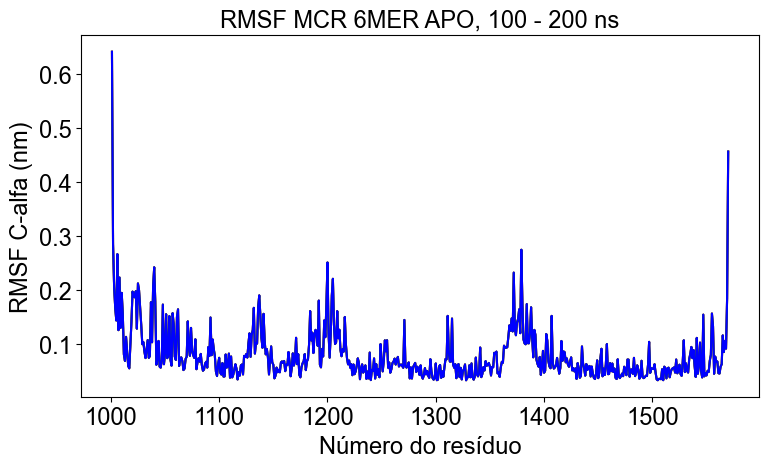

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(mcr_6mer_apo_rmsf_chA1['Número do resíduo'], mcr_6mer_apo_rmsf_chA1['RMSF'], color='r', label='Réplica 1')
plt.plot(mcr_6mer_apo_rmsf_chA1['Número do resíduo'], mcr_6mer_apo_rmsf_chA1['RMSF'], color='g', label='Réplica 2')
plt.plot(mcr_6mer_apo_rmsf_chA1['Número do resíduo'], mcr_6mer_apo_rmsf_chA1['RMSF'], color='b', label='Réplica 3')
plt.title('RMSF MCR 6MER APO, 100 - 200 ns')
plt.xlabel('Número do resíduo')
#plt.xlim([990, 1567])
#plt.ylim([0.0, 0.3])
plt.ylabel('RMSF C-alfa (nm)')
fig.tight_layout()
plt.show()

### SASA (_Solvent Accessible Surface Area_)

`sasa.n.xvg` = Área total em função do tempo

`sasa_res.n.xvg`= Área média por resíduo

`sasa_vol.n.xvg` = Área total e densidade em função do átomo

#### Área total em função do tempo

In [14]:
colunas_sasa = ['ps','Área','Área 2?']


mcr_6mer_apo_sasa1 = converte_xvg('analises_mcr_6mer_apo/sasa.1.xvg', colunas_sasa)
mcr_6mer_apo_sasa2 = converte_xvg('analises_mcr_6mer_apo/sasa.2.xvg',colunas_sasa)
mcr_6mer_apo_sasa3 = converte_xvg('analises_mcr_6mer_apo/sasa.3.xvg',colunas_sasa)

mcr_6mer_apo_sasa1

ps     Área  Área 2?
0         0.0  563.403  563.403
1      1000.0  609.548  609.548
2      2000.0  618.652  618.652
3      3000.0  623.294  623.294
4      4000.0  629.103  629.103
..        ...      ...      ...
196  196000.0  664.338  664.338
197  197000.0  653.680  653.680
198  198000.0  664.984  664.984
199  199000.0  659.352  659.352
200  200000.0  667.976  667.976

[201 rows x 3 columns]

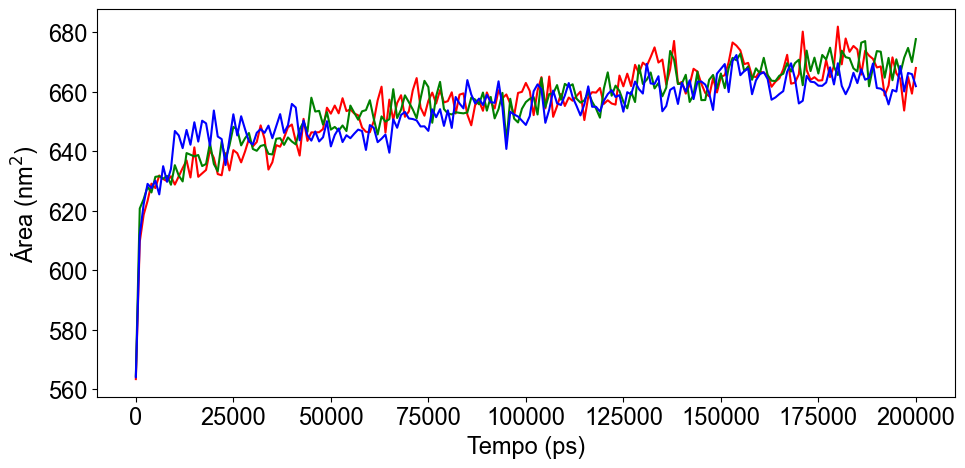

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(mcr_6mer_apo_sasa1['ps'], mcr_6mer_apo_sasa1['Área'], color='r')
plt.plot(mcr_6mer_apo_sasa2['ps'], mcr_6mer_apo_sasa2['Área'], color='g')
plt.plot(mcr_6mer_apo_sasa3['ps'], mcr_6mer_apo_sasa3['Área'], color='b')
plt.xlabel('Tempo (ps)')
plt.ylabel('Área (nm$^2$)')
#plt.ylim([620, 680])
fig.tight_layout()
plt.show()

#### Área total e densidade em função do tempo

In [16]:
colunas_sasa_vol = ['ps', 'Área', 'Densidade']

mcr_6mer_apo_sasa_vol1 = converte_xvg('analises_mcr_6mer_apo/sasa_vol.1.xvg', colunas_sasa_vol)
mcr_6mer_apo_sasa_vol2 = converte_xvg('analises_mcr_6mer_apo/sasa_vol.2.xvg',colunas_sasa_vol)
mcr_6mer_apo_sasa_vol3 = converte_xvg('analises_mcr_6mer_apo/sasa_vol.3.xvg',colunas_sasa_vol)

mcr_6mer_apo_sasa_vol1

ps     Área  Densidade
0         0.0  404.865   1108.895
1      1000.0  421.792   1064.393
2      2000.0  425.131   1056.033
3      3000.0  426.212   1053.355
4      4000.0  426.888   1051.686
..        ...      ...        ...
196  196000.0  433.244   1036.258
197  197000.0  431.841   1039.625
198  198000.0  431.677   1040.021
199  199000.0  430.517   1042.822
200  200000.0  433.301   1036.121

[201 rows x 3 columns]

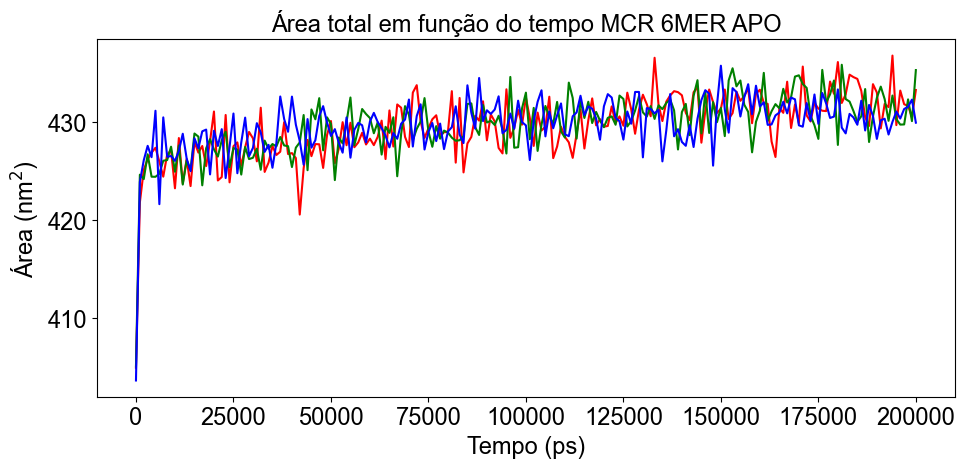

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mcr_6mer_apo_sasa_vol1['ps'], mcr_6mer_apo_sasa_vol1['Área'], color='r', label='Réplica 1')
plt.plot(mcr_6mer_apo_sasa_vol2['ps'], mcr_6mer_apo_sasa_vol2['Área'], color='g', label='Réplica 2')
plt.plot(mcr_6mer_apo_sasa_vol3['ps'], mcr_6mer_apo_sasa_vol3['Área'], color='b', label='Réplica 3')
plt.xlabel('Tempo (ps)')
plt.ylabel('Área (nm$^2$)')
plt.title('Área total em função do tempo MCR 6MER APO')
fig.tight_layout()
plt.show()

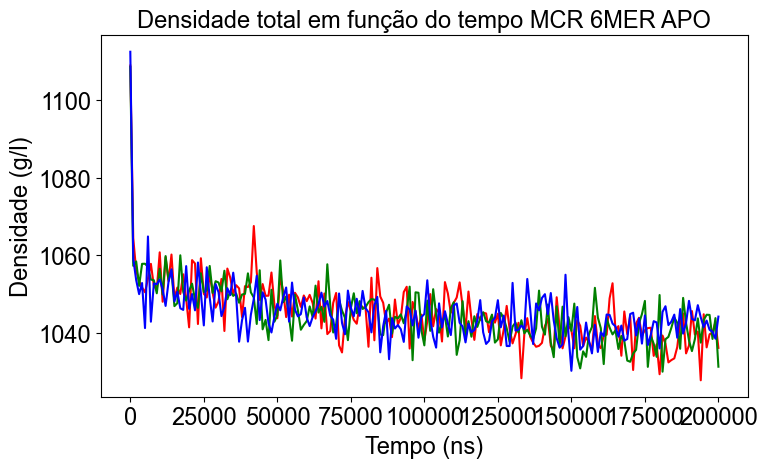

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(mcr_6mer_apo_sasa_vol1['ps'], mcr_6mer_apo_sasa_vol1['Densidade'], color='r')
plt.plot(mcr_6mer_apo_sasa_vol2['ps'], mcr_6mer_apo_sasa_vol2['Densidade'], color='g')
plt.plot(mcr_6mer_apo_sasa_vol3['ps'], mcr_6mer_apo_sasa_vol3['Densidade'], color='b')
plt.ylabel('Densidade (g/l)')
plt.xlabel('Tempo (ns)')
plt.title('Densidade total em função do tempo MCR 6MER APO')
fig.tight_layout()
plt.show()

#### Área média por resíduo

In [19]:
colunas_sasa_res = ['Número do resíduo','1?', '2?', '3?', '4?']

mcr_6mer_apo_sasa_res1 = converte_xvg('analises_mcr_6mer_apo/sasa_res.1.xvg', colunas_sasa_res)
mcr_6mer_apo_sasa_res2 = converte_xvg('analises_mcr_6mer_apo/sasa_res.2.xvg', colunas_sasa_res)
mcr_6mer_apo_sasa_res3 = converte_xvg('analises_mcr_6mer_apo/sasa_res.3.xvg', colunas_sasa_res)

mcr_6mer_apo_sasa_res1

Número do resíduo     1?     2?     3?     4?
0                1001.0  1.500  0.662  1.500  0.662
1                1002.0  0.511  0.205  0.511  0.205
2                1003.0  0.803  0.161  0.803  0.161
3                1004.0  1.121  0.141  1.121  0.141
4                1005.0  0.274  0.139  0.274  0.139
...                 ...    ...    ...    ...    ...
2499             6244.0  0.016  0.026  0.016  0.026
2500             6245.0  0.375  0.176  0.375  0.176
2501             6246.0  0.681  0.214  0.681  0.214
2502             6247.0  0.122  0.118  0.122  0.118
2503             6248.0  1.985  0.244  1.985  0.244

[2504 rows x 5 columns]

### RG (_Radius of Gyration_)

In [20]:
colunas_rg = ['ps','Rg','Rg-x','Rg-y','Rg-z']

mcr_6mer_apo_rg1 = converte_xvg('analises_mcr_6mer_apo/rg.1.xvg', colunas_rg)
mcr_6mer_apo_rg2 = converte_xvg('analises_mcr_6mer_apo/rg.2.xvg', colunas_rg)
mcr_6mer_apo_rg3 = converte_xvg('analises_mcr_6mer_apo/rg.3.xvg', colunas_rg)

mcr_6mer_apo_rg1

ps        Rg      Rg-x      Rg-y      Rg-z
0         0.0  3.685662  2.522099  3.209733  3.241128
1      1000.0  3.747058  2.577684  3.260205  3.287456
2      2000.0  3.748626  2.578248  3.260357  3.290448
3      3000.0  3.748441  2.581034  3.262803  3.285400
4      4000.0  3.751449  2.576773  3.262531  3.295869
..        ...       ...       ...       ...       ...
196  196000.0  3.785674  2.595236  3.292220  3.329984
197  197000.0  3.780030  2.595982  3.287004  3.321719
198  198000.0  3.782954  2.596103  3.293285  3.322046
199  199000.0  3.783500  2.592507  3.291679  3.327664
200  200000.0  3.785583  2.598398  3.291090  3.328431

[201 rows x 5 columns]

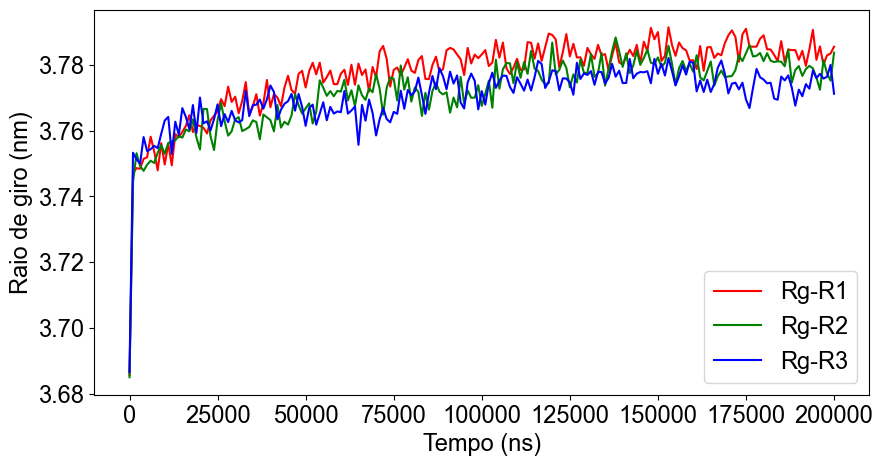

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mcr_6mer_apo_rg1['ps'], mcr_6mer_apo_rg1['Rg'], color='r', label='Rg-R1')
plt.plot(mcr_6mer_apo_rg2['ps'], mcr_6mer_apo_rg2['Rg'], color='g', label='Rg-R2')
plt.plot(mcr_6mer_apo_rg3['ps'], mcr_6mer_apo_rg3['Rg'], color='b', label='Rg-R3')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Tempo (ns)')
plt.ylabel('Raio de giro (nm)')
plt.legend()
plt.show()

### HBOND (_Hydrogen Bonds_)

In [23]:
colunas_hb = ['ps','Lig Feitas','Ligs em potencial']

mcr_6mer_apo_hb1 = converte_xvg('analises_mcr_6mer_apo/hb.1.xvg', colunas_hb)
mcr_6mer_apo_hb2 = converte_xvg('analises_mcr_6mer_apo/hb.2.xvg', colunas_hb)
mcr_6mer_apo_hb3 = converte_xvg('analises_mcr_6mer_apo/hb.3.xvg', colunas_hb)

mcr_6mer_apo_hb1

ps  Lig Feitas  Ligs em potencial
0         0.0      2540.0            12545.0
1      1000.0      2423.0            12114.0
2      2000.0      2394.0            12136.0
3      3000.0      2408.0            12173.0
4      4000.0      2426.0            12050.0
..        ...         ...                ...
196  196000.0      2272.0            11942.0
197  197000.0      2280.0            11898.0
198  198000.0      2282.0            11945.0
199  199000.0      2290.0            11957.0
200  200000.0      2290.0            11905.0

[201 rows x 3 columns]

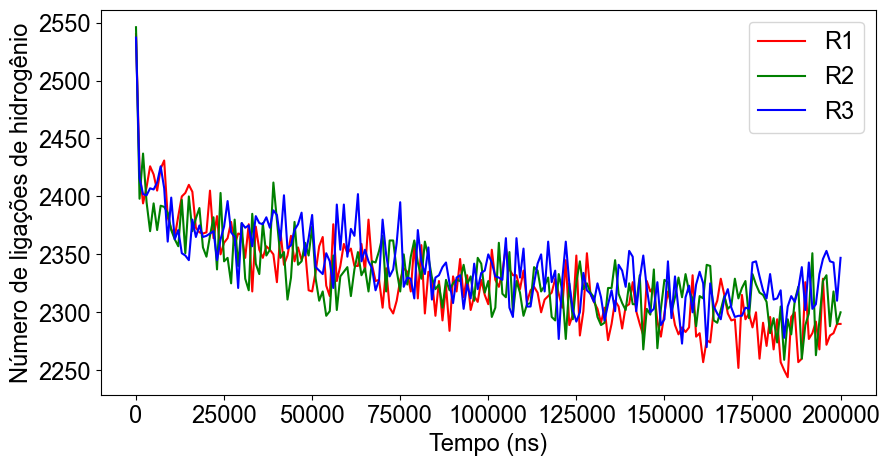

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mcr_6mer_apo_hb1['ps'], mcr_6mer_apo_hb1['Lig Feitas'], color='r', label='R1')
plt.plot(mcr_6mer_apo_hb2['ps'], mcr_6mer_apo_hb2['Lig Feitas'], color='g', label='R2')
plt.plot(mcr_6mer_apo_hb3['ps'], mcr_6mer_apo_hb3['Lig Feitas'], color='b', label='R3')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Tempo (ns)')
plt.ylabel('Número de ligações de hidrogênio')
plt.legend()
plt.show()

## MER 4mer apo

In [25]:
colunas_rmsd = ['ps', 'nm']

mer_4mer_apo_rmsd1 = converte_xvg('analises_mer_4mer_apo/rmsd_ca-ca.1.xvg', colunas_rmsd) 
mer_4mer_apo_rmsd2 = converte_xvg('analises_mer_4mer_apo/rmsd_ca-ca.2.xvg', colunas_rmsd) 
mer_4mer_apo_rmsd3 = converte_xvg('analises_mer_4mer_apo/rmsd_ca-ca.3.xvg', colunas_rmsd)

print(mer_4mer_apo_rmsd1)

           ps        nm
0         0.0  0.000265
1      1000.0  0.185004
2      2000.0  0.198542
3      3000.0  0.196288
4      4000.0  0.205479
..        ...       ...
196  196000.0  0.215483
197  197000.0  0.235010
198  198000.0  0.227765
199  199000.0  0.270126
200  200000.0  0.268158

[201 rows x 2 columns]


In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(mer_4mer_apo_rmsd1)
    pass


### RMSD

       ps    RMSD_1    RMSD_2    RMSD_3  RMSD_media  RMSD_std   ns
0     0.0  0.000265  0.000235  0.000265    0.000255  0.000017  0.0
1  1000.0  0.185004  0.222174  0.185004    0.197394  0.021460  1.0
2  2000.0  0.198542  0.203595  0.198542    0.200226  0.002917  2.0
3  3000.0  0.196288  0.205418  0.196288    0.199331  0.005272  3.0
4  4000.0  0.205479  0.215465  0.205479    0.208808  0.005765  4.0


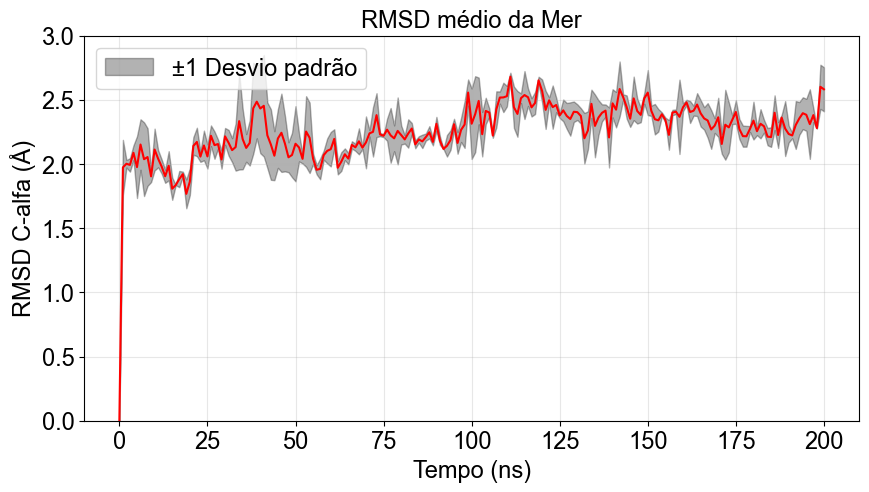

In [30]:
# Exemplo: df1, df2 e df3 são suas replicatas
# Cada um tem colunas: "tempo" (ns), "RMSD" (Å)

# Renomear colunas de RMSD para identificar cada replicata
df1 = mer_4mer_apo_rmsd1.rename(columns={"nm": "RMSD_1"})
df2 = mer_4mer_apo_rmsd2.rename(columns={"nm": "RMSD_2"})
df3 = mer_4mer_apo_rmsd1.rename(columns={"nm": "RMSD_3"})

# Juntar todos pelo tempo
df_all = df1.merge(df2, on="ps").merge(df3, on="ps")

# Calcular média e desvio padrão
df_all["RMSD_media"] = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].mean(axis=1)
df_all["RMSD_std"]   = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].std(axis=1)
df_all["ns"] = df_all["ps"] / 1000

print(df_all.head())


# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["ns"], df_all["RMSD_media"]*10, color="red") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["ns"],
    df_all["RMSD_media"]*10 - df_all["RMSD_std"]*10,
    df_all["RMSD_media"]*10 + df_all["RMSD_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSD C-alfa (Å)")
plt.title("RMSD médio da Mer")
plt.legend()
plt.ylim(0, 3.0)
plt.grid(alpha=0.3)
plt.savefig('RMSD Mer_APO.jpg', dpi=400)
plt.show()

## RMSF 

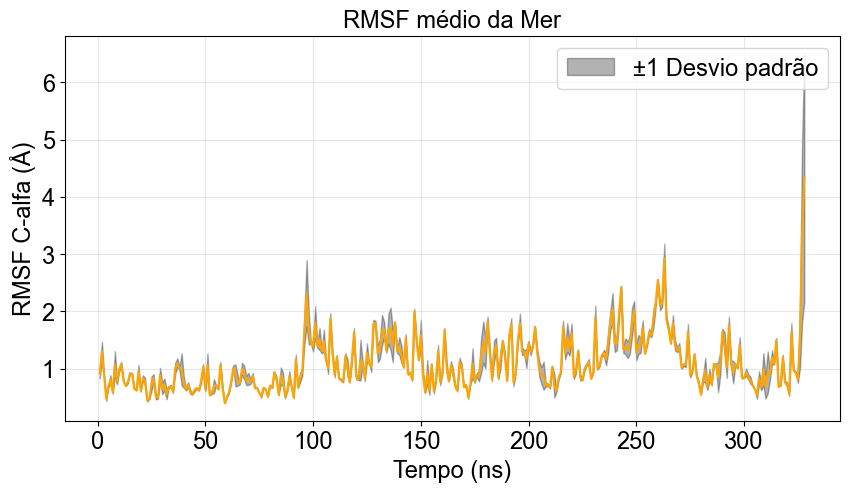

In [29]:
mer_4mer_apo_rmsf1 = converte_xvg('analises_mer_4mer_apo/rmsf_100-200ns_ch.1.xvg', colunas_rmsf) 
mer_4mer_apo_rmsf2 = converte_xvg('analises_mer_4mer_apo/rmsf_100-200ns_ch.2.xvg', colunas_rmsf) 
mer_4mer_apo_rmsf3 = converte_xvg('analises_mer_4mer_apo/rmsf_100-200ns_ch.3.xvg', colunas_rmsf)


df1 = mer_4mer_apo_rmsf1.rename(columns={"RMSF": "RMSF_1"})
df2 = mer_4mer_apo_rmsf2.rename(columns={"RMSF": "RMSF_2"})
df3 = mer_4mer_apo_rmsf1.rename(columns={"RMSF": "RMSF_3"})
#print(df1, df2, df3)


df_all = df1.merge(df2, on="Número do resíduo").merge(df3, on="Número do resíduo")

# Calcular média e desvio padrão
df_all["RMSF_media"] = df_all[["RMSF_1", "RMSF_2", "RMSF_3"]].mean(axis=1)
df_all["RMSF_std"]   = df_all[["RMSF_1", "RMSF_2", "RMSF_3"]].std(axis=1)

# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["Número do resíduo"], df_all["RMSF_media"]*10, color="orange") #label="Média do RMSD"

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["Número do resíduo"],
    df_all["RMSF_media"]*10 - df_all["RMSF_std"]*10,
    df_all["RMSF_media"]*10 + df_all["RMSF_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da Mer")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF Mer_APO.jpg', dpi=400)
plt.show()